<a href="https://colab.research.google.com/github/Richardo-Sitepu/Python_ModSim/blob/main/Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [3]:
f=1800 #MHz
loc='urban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [4]:
LpUrban=cos(f,'urban',tower,user,d)
LpSuburban=cos(f,'suburban',tower,user,d)
LpOpen=cos(f,'open',tower,user,d)

In [5]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

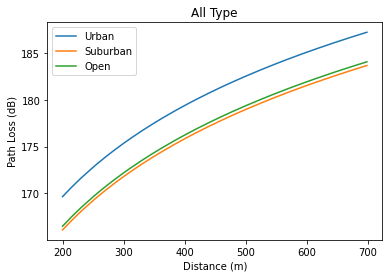

In [6]:
plt.figure()
plt.plot(d_sort,Urban_sort,label='Urban')
plt.plot(d_sort,Suburban_sort,label='Suburban')
plt.plot(d_sort,Open_sort,label='Open')
plt.legend()
plt.title('All Type')
plt.xlabel('Distance (m)')
plt.ylabel('Path Loss (dB)')
plt.show()